In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import scripts.visualization as viz
viz.load_matplotlib()

In [2]:
%%time

n = 10000
m = 3

ntimes = 20

p1 = 0.1
p2 = 0.3
p3 = 0.8

g1 = [nx.barabasi_albert_graph(n, m) for _ in range(ntimes)]
print('BA completed')
g2 = [nx.powerlaw_cluster_graph(n, m, p1) for _ in range(ntimes)]
print('BA with triad formation p=0.1')
g3 = [nx.powerlaw_cluster_graph(n, m, p2) for _ in range(ntimes)]
print('BA with triad formation p=0.3')
g4 = [nx.powerlaw_cluster_graph(n, m, p3) for _ in range(ntimes)]
print('BA with triad formation p=0.8')

BA completed
BA with triad formation p=0.1
BA with triad formation p=0.3
BA with triad formation p=0.8
Wall time: 19.2 s


In [3]:
%%time
import itertools

def get_clustering(g: nx.Graph):
    return list(dict(nx.clustering(g)).values())

def get_clustering_graphs(gs):
    return list(itertools.chain(*[get_clustering(g) for g in gs]))

c1 = get_clustering_graphs(g1)
c2 = get_clustering_graphs(g2)
c3 = get_clustering_graphs(g3)
c4 = get_clustering_graphs(g4)

Wall time: 32.8 s


In [4]:
from statsmodels.distributions.empirical_distribution import ECDF


def get_ccdf(data):
    ecdf = ECDF(data)
    return ecdf.x, 1 - ecdf.y

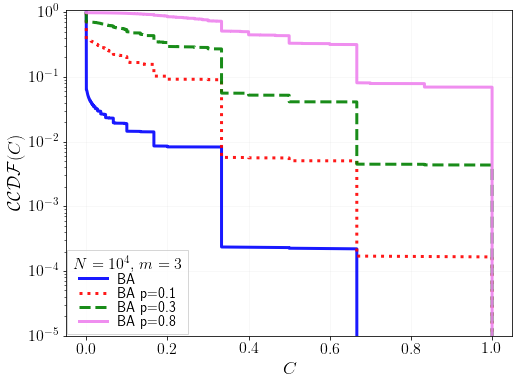

In [5]:
plt.grid(alpha=0.1)

labels = ['BA', f'BA p={p1}', f'BA p={p2}', f'BA p={p3}']
colors = ['blue', 'red', 'green', 'violet', 'grey', 'brown']
linestyles = ['solid', 'dotted', 'dashed', 'solid', 'dashdot', 'solid']

C = [c1, c2, c3, c4]

plt.grid(alpha=0.1)
for i in range(len(C)):
    x, y = get_ccdf(C[i])
    plt.plot(x, y, alpha=0.9, linewidth=3, linestyle=linestyles[i], color=colors[i], label=labels[i])

plt.yscale('log')
plt.xlabel('$C$', fontsize=18)
plt.ylabel('$\mathcal{CCDF}(C)$', fontsize=18)
plt.ylim(1e-5, 1.1)
plt.legend(loc='lower left', fontsize=14, borderaxespad=0.1, ncol=1, 
           labelspacing=0.02, fancybox=False, columnspacing=0.3, title="$N=10^4,\,m=3$")
# viz.save_figure('../plots/ccdf_c_distribution_BA_triad_formation.pdf')
# plt.show()

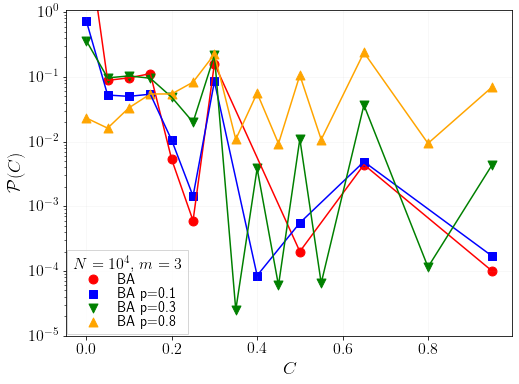

In [6]:
n_bins = 20

plt.grid(alpha=0.1)

probs, bins = np.histogram(c1, bins=n_bins, density=True)
no_zeros = np.where(probs != 0)
probs = probs[no_zeros]
bins = bins[no_zeros]
plt.scatter(bins, probs, label='BA', color='red', s=80)
plt.plot(bins, probs, color='red')

probs, bins = np.histogram(c2, bins=n_bins, density=True)
no_zeros = np.where(probs != 0)
probs = probs[no_zeros]
bins = bins[no_zeros]
plt.scatter(bins, probs / probs.sum(), label=f'BA p={p1}', color='blue', s=80, marker='s')
plt.plot(bins, probs / probs.sum(), color='blue')

probs, bins = np.histogram(c3, bins=n_bins, density=True)
no_zeros = np.where(probs != 0)
probs = probs[no_zeros]
bins = bins[no_zeros]
plt.scatter(bins, probs / probs.sum(), label=f'BA p={p2}', color='green', marker='v', s=80)
plt.plot(bins, probs / probs.sum(), color='green')

probs, bins = np.histogram(c4, bins=n_bins, density=True)
no_zeros = np.where(probs != 0)
probs = probs[no_zeros]
bins = bins[no_zeros]
plt.scatter(bins, probs / probs.sum(), label=f'BA p={p3}', color='orange', marker='^', s=80)
plt.plot(bins, probs / probs.sum(), color='orange')

plt.yscale('log')
plt.xlabel('$C$', fontsize=18)
plt.ylabel('$\mathcal{P}(C)$', fontsize=18)
plt.ylim(1e-5, 1.1)
plt.legend(loc='lower left', fontsize=14, borderaxespad=0.1, ncol=1, 
           labelspacing=0.02, fancybox=False, columnspacing=0.3, title="$N=10^4,\,m=3$")
# viz.save_figure('../plots/p_c_distribution_BA_triad_formation.pdf')
# plt.show()

In [7]:
[np.mean(c) for c in C] # average clustering coefficient

[0.005209432599271697,
 0.0559184249569422,
 0.1611478338199877,
 0.4520535916297371]

### P(k)

In [8]:
def get_degrees(g):
    return list(dict(g.degree).values())


def get_all_degrees(gs):
    return list(itertools.chain(*[get_degrees(g) for g in gs]))


k1 = get_all_degrees(g1)
k2 = get_all_degrees(g2)
k3 = get_all_degrees(g3)
k4 = get_all_degrees(g4)

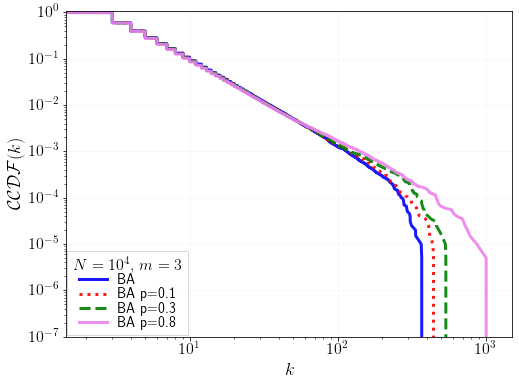

In [9]:
k1 = get_all_degrees(g1)
plt.grid(alpha=0.1)

labels = ['BA', f'BA p={p1}', f'BA p={p2}', f'BA p={p3}']
colors = ['blue', 'red', 'green', 'violet', 'grey', 'brown']
linestyles = ['solid', 'dotted', 'dashed', 'solid', 'dashdot', 'solid']

k = [k1, k2, k3, k4]

plt.grid(alpha=0.1)
for i in range(len(k)):
    x, y = get_ccdf(k[i])
    plt.plot(x, y, alpha=0.9, linewidth=3, linestyle=linestyles[i], color=colors[i], label=labels[i])

plt.yscale('log')
plt.xscale('log')
plt.xlabel('$k$', fontsize=18)
plt.ylabel('$\mathcal{CCDF}(k)$', fontsize=18)
plt.ylim(1e-7, 1.1)
plt.legend(loc='lower left', fontsize=14, borderaxespad=0.1, ncol=1, 
           labelspacing=0.02, fancybox=False, columnspacing=0.3, title="$N=10^4,\,m=3$")
# viz.save_figure('../plots/ccdf_k_distribution_BA_triad_formation.pdf')

In [10]:
[np.mean(kx) for kx in k] # average degree

[5.9982, 5.99791, 5.99747, 5.99768]